## Exploratory Data Analysis

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_reviews = pd.read_parquet('../data/raw/reviews_2024-11-25_22-13_PH.parquet', engine = 'pyarrow')

The reviews dataset

In [6]:
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,appId
0,2239ead0-76d7-4c95-ba2e-3b4c8d30afbb,Boy Z,https://play-lh.googleusercontent.com/a/ACg8oc...,AaB bCc,5,0,None,2024-11-24 11:29:25,None,NaT,None,com.rvappstudios.abc_kids_toddler_tracing_phonics
1,c0f25990-fffa-4302-8b80-6bd598b3b682,Jill,https://play-lh.googleusercontent.com/a/ACg8oc...,i love it and its good for my daughter she rea...,5,0,2.0.6,2024-11-24 10:00:04,None,NaT,2.0.6,com.rvappstudios.abc_kids_toddler_tracing_phonics
2,9b502d4b-4595-404b-a845-48c946f4c574,Hashir Ashfaq,https://play-lh.googleusercontent.com/a/ACg8oc...,amp,5,0,None,2024-11-24 03:33:30,None,NaT,None,com.rvappstudios.abc_kids_toddler_tracing_phonics
3,cc36d108-07ef-4aa3-839f-dbe3b450bf74,KeanuSandra Mabry,https://play-lh.googleusercontent.com/a/ACg8oc...,I would be proud to do this I wished I would h...,5,0,2.0.6,2024-11-24 02:20:33,None,NaT,2.0.6,com.rvappstudios.abc_kids_toddler_tracing_phonics
4,6f509403-c2ee-479e-89f0-2d15697c0f5e,Zanele Gwamanda,https://play-lh.googleusercontent.com/a/ACg8oc...,free,3,0,2.0.6,2024-11-24 01:04:33,None,NaT,2.0.6,com.rvappstudios.abc_kids_toddler_tracing_phonics


Reviews' data types

In [7]:
df_reviews.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
appVersion                      object
appId                           object
dtype: object

##### Missing Data (NAs)

In [8]:
df_reviews.isna().sum()

reviewId                    0
userName                    0
userImage                   0
content                    12
score                       0
thumbsUpCount               0
reviewCreatedVersion    31298
at                          0
replyContent            87604
repliedAt               87604
appVersion              31298
appId                       0
dtype: int64

- There are ~87k nulls observed in replyContent and RepliedAt, which is the information for developer's reply. Hence, there are a lot of reviews that the app developer doesn't reply to.
- There are 31k nulls observed in reviewCreatedVersion. 
- Only 12 nulls are observed in user reviews.

Duplicates

In [9]:
df_reviews.nunique()

reviewId                120872
userName                111204
userImage               114979
content                  94332
score                        5
thumbsUpCount              591
reviewCreatedVersion      2076
at                      120078
replyContent             14918
repliedAt                33026
appVersion                2076
appId                       94
dtype: int64

In [10]:
df_reviews.shape

(120872, 12)

Since total rows and unique reviewId's matched, no duplicates exists.

### Categorical Variables
---

In [11]:
for x in df_reviews.columns:
    if df_reviews[x].dtype == 'object':
        print(x)

reviewId
userName
userImage
content
reviewCreatedVersion
replyContent
appVersion
appId


#### userName

In [12]:
# There are multiple review's on some users.
df_reviews['userName'].value_counts()[:20]

userName
A Google user    3632
David              24
James              23
Larry Witt         22
Alex               19
Chris              19
Michael            19
Brian              15
Joseph             14
Jason              14
Mike               13
Raj Kumar          13
Michelle           12
Andrew             12
Susan              12
No Name            12
Anil Kumar         11
Adam               11
Vijay Kumar        11
Ryan               11
Name: count, dtype: int64

In [13]:
# userName: A Google user
df_reviews[df_reviews['userName'] == 'A Google user'].head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,appId
171,6d085ce1-2bfb-4b77-83f3-488962b4b665,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nostalgia !!!!!,5,0,None,2024-09-22 19:29:23,None,NaT,None,com.rvappstudios.abc_kids_toddler_tracing_phonics
1552,1df84782-4748-48e4-9820-4ca254083f8f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Jalen little,5,0,5.3.5,2024-10-19 07:36:56,None,NaT,5.3.5,org.pbskids.gamesapp
1583,a0a592c3-c4f0-4eb4-97f9-113ef940c348,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love this game it has my kids are playing so...,4,1,5.3.5,2024-09-29 10:44:27,None,NaT,5.3.5,org.pbskids.gamesapp
2201,3efd173b-42dc-4473-8d9c-6f6b3e7b4bb4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,jbyytyungum xemhtn . f 😧😧😂😂😂,5,0,4.2.8,2023-08-21 06:42:53,None,NaT,4.2.8,org.pbskids.gamesapp
3824,6f62e9ac-49d5-476c-a183-a67ecc989507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very Good Game,5,0,1.6.1,2023-08-17 10:41:30,None,NaT,1.6.1,com.rvappstudios.math.kids.counting


#### userImage

In [14]:
df_reviews[df_reviews['userName'] == 'A Google user']['appId'].value_counts()

appId
com.intellijoy.android.reading.free                           1226
com.letterschool.lite                                         1080
com.abcya.android.games                                        380
com.amayasoft.dinosaur.games.little.kids.toddlers              245
com.rvappstudios.numbers123.toddler.counting.tracing           241
                                                              ... 
com.kids.learn.reading.app                                       1
com.zynga.starwars.hunters                                       1
com.rvappstudios.baby.toddler.kids.games.learning.activity       1
com.tencent.ig                                                   1
com.rvappstudios.abc_kids_toddler_tracing_phonics                1
Name: count, Length: 82, dtype: int64

It seems like its an API data issue since games like 'com.intellijoy.android.reading.free' and 'com.letterschool.lite' contains a lot of this specific username. The cause of the error may occur upon extracting the data via API.

In [15]:
df_reviews[['userName','userImage']].value_counts()[:20]

userName                userImage                                                                                                               
A Google user           https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g    3632
Jamie Boyd              https://play-lh.googleusercontent.com/a/ACg8ocLa6T4FE0UiClOwhBaU87OlLMKQCqnO5tVzQJ42YEBr3bOZkw=mo                              9
VIVEK K MISHRA          https://play-lh.googleusercontent.com/a-/ALV-UjU6sihGpCGrvxPr07kuG1C_Razk4QA8vrvZy7N2lRroYsx5-Q4                               9
Amjid Ali               https://play-lh.googleusercontent.com/a-/ALV-UjV6bBX-LwkEu-vIO06U7UQHHPuAG8qcDMOOFJEqTJVeMXmOg_o                               9
Tony Lags               https://play-lh.googleusercontent.com/a-/ALV-UjXGYX_SpMy276I87wSv_ooGqPE6f11eMUA-sdAGlVkHe_DDIW2qeA                            9
Leviwaifu               https://play-lh.googleusercontent.com/a-/ALV-UjUve0XnbsX-rrCtJ4vVm

Given the different values of userName & userImage, there might be possible cases that the userName is the same but different userImage,  
Which may be:
- A single User that changes his/her userImage one or more.
- Different Users with same userName

userName: David as an example.

In [16]:
df_reviews[['userName','userImage']][df_reviews['userName'] == 'David'].value_counts()

userName  userImage                                                                                          
David     https://play-lh.googleusercontent.com/a-/ALV-UjXTaFP3zQA0FlkWyyMe44W3koqsXPK7a1XpbQRpcSxemCpbbWvk      2
          https://play-lh.googleusercontent.com/a-/ALV-UjUz_DdULHDdw09NO7qWOhs52CEOZYaId_ffFZMFotQr1BFzyRIN      1
          https://play-lh.googleusercontent.com/a/ACg8ocJp-irA_nvc4K1dWeYbAA8nP3SGRPQHmpnOA5lz1XIM0IZrhA=mo      1
          https://play-lh.googleusercontent.com/a/ACg8ocLRk4444UDhel45VtEaeGKnp6TH4HiIl0dTY_Wnkjvykrgcnw=mo      1
          https://play-lh.googleusercontent.com/a/ACg8ocLCcnqQz2MMSo077YHH1ZBAwNGUqVstUWA9q1OveUBUt0zzkg=mo      1
          https://play-lh.googleusercontent.com/a/ACg8ocLB1fE8CBJtQfgmhYLIg8cJjavoobUQT1M37xHY_iS7G6bLwA=mo      1
          https://play-lh.googleusercontent.com/a/ACg8ocL-4A7eUMpYgiX5KUlSKegBqWC1BrA1LycMVBqrEdlDKInRUg=mo      1
          https://play-lh.googleusercontent.com/a/ACg8ocKygdfTG6JHuBV5_rdu4_1NIHz3drG

In [17]:
df_reviews[['userName','userImage','at','content','appId']][df_reviews['userName'] == 'David'].sort_values(by = 'at', ascending=True)

,userName,userImage,at,content,appId
34769,David,https://play-lh.googleusercontent.com/a-/ALV-U...,2021-07-07 18:17:06,"Free app, kid likes to play on tablet. I hope ...",com.mrswordsmith.WordTag
28058,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2022-02-04 02:50:23,"Worked fine the other day, but now loads 50% a...",com.peppapig.worldofpeppapig_g
62727,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2023-09-18 03:16:37,Pretty decent,com.gameinsight.gplay.mmanor
56912,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2023-10-21 13:57:08,great adventure game,com.gamegos.adventure.bay.paradise.farm
92846,David,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-08-02 06:19:46,Not for me,com.nintendo.zara
88882,David,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-08-02 06:20:09,not for me,com.nintendo.zaka
53699,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-08-03 16:26:21,your game is good but o. a phone there are bit...,com.xgamesgroup.puzzleisland
86173,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-08-06 12:04:31,I'm hooked!,com.starform.metalstorm
88696,David,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-08-18 11:25:45,Game crashes when starting with error code 806...,com.nintendo.zaka
99466,David,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-09-05 23:59:16,I have had this game before and have it again ...,com.kabam.marvelbattle


Given the data we have, its hard to look at if its the same "David" for all of these reviews. A customerId should be helpful in this scenario.

Looking at complete names with middle initial may be the same person/user for all reviews.

In [18]:
df_reviews[['userName','userImage','at','content','appId']][df_reviews['userName'] == 'Patrick P Smyth'].sort_values(by = 'at', ascending=True)

,userName,userImage,at,content,appId
71089,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-04-21 07:56:10,I loved it before my money began to vanish wit...,com.ffsvideogames.aab.eor4f2p
70876,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-04-28 02:50:13,the beginning is mind twisting difficult.,com.elephantgames.gtguestfromthefuture
63468,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-07-05 06:11:43,"Eats money, nothing is terribly obvious and th...",com.fivebn.lt1.f2p
50140,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-09-08 23:39:30,Hidden town squares full of objects repeated o...,com.g5e.hiddencity.android
45655,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-03 03:16:58,Ban this game: it extorts money not only for h...,com.artifexmundi.mopa1.gp
40931,Patrick P Smyth,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-12 06:16:05,Platform for advertising other games. I left i...,com.haiku.adventure.escape.game.mystery.stories


In [19]:
df_reviews[['userName','userImage']][df_reviews['userName'] == 'Patrick P Smyth'].value_counts()

userName         userImage                                                                                        
Patrick P Smyth  https://play-lh.googleusercontent.com/a-/ALV-UjUM_KfAwW7dcirYV_cABdV1lXP2_MRIRKIGeECogOk3qWUlouVv    6
Name: count, dtype: int64

A sample of user that do have multiple reviews having distinct userName and userImage might be considered as a single user. 

#### reviewCreatedVersion

In [20]:
df_reviews['reviewCreatedVersion'].apply(lambda x: 'NA' if x == None else 'with_version').value_counts()

reviewCreatedVersion
with_version    89574
NA              31298
Name: count, dtype: int64

#### reviewCreatedVersion

In [21]:
df_reviews['at'].value_counts()[:20]

at
2024-11-24 16:36:18    4
2024-11-24 18:52:39    3
2024-11-24 16:08:09    3
2024-11-24 20:22:44    3
2024-11-24 20:22:52    3
2024-11-23 14:37:22    3
2024-11-24 17:04:00    3
2024-11-23 22:40:15    3
2024-11-24 20:12:32    3
2024-11-24 15:48:46    3
2024-11-20 20:34:48    3
2024-11-24 19:05:47    3
2024-11-24 20:07:43    3
2024-11-23 01:10:14    3
2024-11-24 18:10:09    3
2024-11-24 19:22:33    3
2024-11-24 05:06:06    3
2024-11-12 01:42:06    3
2024-11-19 22:52:57    3
2024-11-18 21:51:04    3
Name: count, dtype: int64

In [22]:
df_reviews[df_reviews['at'] == '2024-11-24 16:36:18']

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,appId
72169,b04e38fd-b6a5-4c88-9caa-81d6d650ff34,Ashley Bautista,https://play-lh.googleusercontent.com/a/ACg8oc...,Always log brat I hate this game,1,0,None,2024-11-24 16:36:18,None,NaT,None,com.roblox.client
72170,43f6abb4-8c81-487c-ac5e-438ff1531caa,Yolande Christiaans,https://play-lh.googleusercontent.com/a-/ALV-U...,It's an amazing app my son loves the games,5,0,2.649.875,2024-11-24 16:36:18,None,NaT,2.649.875,com.roblox.client
72171,4d299d99-b423-4001-8e70-100efc52a047,Kiran ghare,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,0,2.650.742,2024-11-24 16:36:18,None,NaT,2.650.742,com.roblox.client
82860,9109e4c3-e2a4-43d6-afc9-dfc8cf6427c6,Rosni Khan,https://play-lh.googleusercontent.com/a/ACg8oc...,Free fire is a good game,5,0,None,2024-11-24 16:36:18,None,NaT,None,com.dts.freefiremax


There are times that "at"'s datetimes are the same for user comments.

Same data with AppVersion

In [23]:
df_reviews[['reviewCreatedVersion','appVersion']].value_counts()

reviewCreatedVersion  appVersion     
6.02.04               6.02.04            1274
5.9.8a                5.9.8a             1225
58.279                58.279             1113
3.5.0                 3.5.0               957
3.10.0.19854920       3.10.0.19854920     955
                                         ... 
2.10.3                2.10.3                1
2.10.3.0              2.10.3.0              1
2.10.9.0              2.10.9.0              1
2.11.1                2.11.1                1
18.0.4                18.0.4                1
Name: count, Length: 2076, dtype: int64

#### replyContent

In [24]:
df_reviews['replyContent'].apply(lambda x: 'NA' if x == None else 'w/ REPLIES').value_counts()

replyContent
NA            87604
w/ REPLIES    33268
Name: count, dtype: int64

In [25]:
df_reviews['repliedAt'].isna().sum()

87604

If there is a "replyContent" then the time is logged in "repliedAt"

### Numerical Variables

#### score

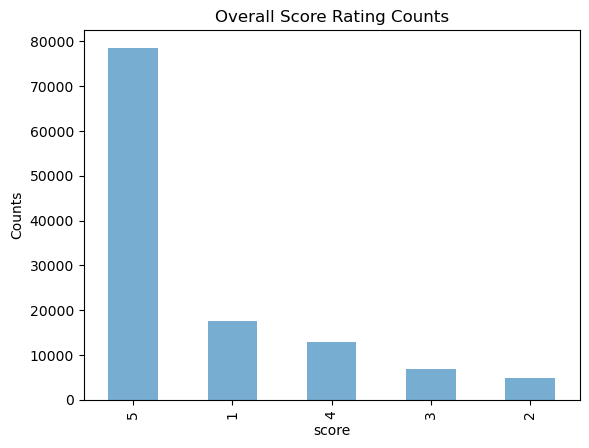

In [26]:
(df_reviews['score'].value_counts()).plot(kind = 'bar', alpha = 0.6)
plt.ylabel('Counts')
plt.title('Overall Score Rating Counts')
plt.show()

- There is not NA observed in score ratings. 
- A large chunk of data is scored as 5.

#### ThumbsUpcount

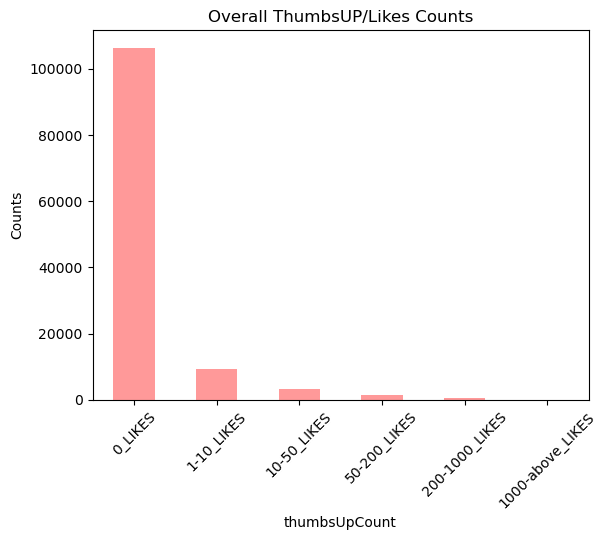

In [27]:
(pd.cut(df_reviews['thumbsUpCount'], bins = [-float('inf'), 1, 10, 50, 200, 1000, float('inf')], labels = ['0_LIKES','1-10_LIKES','10-50_LIKES','50-200_LIKES', '200-1000_LIKES','1000-above_LIKES']).value_counts()).plot(kind = 'bar', color = 'red',alpha = 0.4)
plt.ylabel('Counts')
plt.title('Overall ThumbsUP/Likes Counts')
plt.xticks(rotation = 45)
plt.show()

### Content 
---
Feature that is the most important for topic modeling

##### Frequency of Words

In [28]:
from collections import Counter
word_frequency = Counter(df_reviews['content'].str.cat(sep = ' ').split())
display(word_frequency.most_common(50))

[('the', 51365),
 ('game', 51028),
 ('I', 44871),
 ('to', 42944),
 ('and', 40397),
 ('is', 31047),
 ('it', 29030),
 ('a', 27494),
 ('this', 24157),
 ('for', 20586),
 ('you', 16982),
 ('of', 16567),
 ('but', 15645),
 ('my', 14550),
 ('good', 14079),
 ('so', 11854),
 ('in', 11746),
 ('have', 10303),
 ('play', 9936),
 ('love', 9726),
 ('very', 9530),
 ('like', 9471),
 ('that', 9015),
 ('not', 8878),
 ('on', 8419),
 ('with', 7917),
 ('are', 7885),
 ('fun', 7822),
 ('This', 7677),
 ("it's", 7098),
 ('app', 6693),
 ('get', 6371),
 ('Good', 6264),
 ('The', 6253),
 ('i', 6185),
 ('me', 6161),
 ('be', 5908),
 ('can', 5732),
 ('just', 5726),
 ('game.', 5341),
 ('all', 5199),
 ('games', 5108),
 ('was', 5090),
 ('really', 5064),
 ('It', 5039),
 ('more', 4855),
 ("It's", 4844),
 ('best', 4639),
 ('Very', 4611),
 ('playing', 4541)]

Most frequents words are a mix of parts of speech but there are some words that do have the same relevance like "games", "game", & "game.", which refers to the word "GAME". We will try to improve these type of words.

#### N-grams
Defined as a sequence of n-words

In [29]:
from nltk.util import ngrams

Counter(list(ngrams(df_reviews['content'].str.cat(sep = ' ').split(), 2))).most_common(50)

[(('this', 'game'), 10659),
 (('the', 'game'), 7262),
 (('game', 'is'), 6663),
 (('I', 'love'), 5306),
 (('to', 'play'), 4291),
 (('This', 'game'), 3573),
 (('of', 'the'), 3380),
 (('I', 'have'), 3368),
 (('love', 'this'), 3184),
 (('is', 'a'), 2994),
 (('good', 'game'), 2917),
 (('in', 'the'), 2736),
 (('and', 'I'), 2608),
 (('This', 'is'), 2506),
 (('I', 'like'), 2439),
 (('have', 'to'), 2429),
 (('it', 'is'), 2393),
 (('the', 'best'), 2393),
 (('game', 'I'), 2319),
 (('game', 'but'), 2259),
 (('is', 'very'), 2180),
 (('game', 'for'), 2166),
 (('to', 'get'), 2061),
 (('is', 'the'), 2057),
 (('and', 'the'), 2039),
 (('love', 'it'), 2021),
 (('game', 'and'), 1995),
 (('I', 'am'), 1985),
 (('for', 'the'), 1833),
 (('very', 'good'), 1803),
 (('to', 'be'), 1802),
 (('It', 'is'), 1768),
 (('The', 'game'), 1754),
 (('for', 'kids'), 1714),
 (('so', 'much'), 1710),
 (('I', "can't"), 1710),
 (('to', 'the'), 1664),
 (('and', 'it'), 1657),
 (('best', 'game'), 1630),
 (('a', 'good'), 1611),
 (('b

##### Application of Lower Casing for improved Frequency and Bigrams

In [30]:
# Word Frequency
word_frequency = Counter(df_reviews['content'].str.lower().str.cat(sep = ' ').split())
display(word_frequency.most_common(50))

[('the', 58246),
 ('game', 53674),
 ('i', 51056),
 ('to', 43779),
 ('and', 42324),
 ('it', 34543),
 ('this', 32412),
 ('is', 32115),
 ('a', 28789),
 ('for', 21220),
 ('good', 20567),
 ('you', 18784),
 ('my', 18595),
 ('but', 17330),
 ('of', 16855),
 ('very', 14305),
 ('so', 14029),
 ('love', 12929),
 ('in', 12259),
 ("it's", 12007),
 ('have', 10721),
 ('not', 10452),
 ('play', 10401),
 ('like', 10050),
 ('fun', 9695),
 ('that', 9362),
 ('on', 8668),
 ('great', 8300),
 ('with', 8128),
 ('are', 8002),
 ('best', 7381),
 ('nice', 7356),
 ('app', 7101),
 ('just', 6696),
 ('get', 6534),
 ('me', 6349),
 ('can', 6226),
 ('be', 6036),
 ('really', 5970),
 ('all', 5756),
 ('game.', 5460),
 ('was', 5352),
 ('games', 5334),
 ('more', 5063),
 ('if', 5011),
 ('no', 4997),
 ('when', 4781),
 ('playing', 4677),
 ('your', 4383),
 ('time', 4341)]

In [31]:
Counter(list(ngrams(df_reviews['content'].str.lower().str.cat(sep = ' ').split(), 2))).most_common(50)

[(('this', 'game'), 14634),
 (('the', 'game'), 9143),
 (('game', 'is'), 7352),
 (('i', 'love'), 6181),
 (('good', 'game'), 4570),
 (('to', 'play'), 4375),
 (('it', 'is'), 4248),
 (('this', 'is'), 4207),
 (('love', 'this'), 4188),
 (('i', 'have'), 3867),
 (('of', 'the'), 3439),
 (('very', 'good'), 3323),
 (('and', 'i'), 3303),
 (('is', 'a'), 3096),
 (('the', 'best'), 3076),
 (('best', 'game'), 3049),
 (('game', 'i'), 2898),
 (('in', 'the'), 2839),
 (('i', 'like'), 2825),
 (('love', 'it'), 2747),
 (('have', 'to'), 2531),
 (('game', 'but'), 2333),
 (('i', 'am'), 2276),
 (('is', 'very'), 2266),
 (('nice', 'game'), 2242),
 (('game', 'for'), 2225),
 (('and', 'the'), 2209),
 (('but', 'i'), 2185),
 (('great', 'game'), 2158),
 (('is', 'the'), 2136),
 (('to', 'get'), 2087),
 (('game', 'and'), 2060),
 (("it's", 'a'), 1983),
 (('this', 'app'), 1980),
 (('so', 'much'), 1893),
 (('for', 'the'), 1880),
 (('i', "can't"), 1878),
 (('love', 'the'), 1876),
 (('to', 'be'), 1861),
 (('if', 'you'), 1850),
 

Converting text/tokens into lower case letters improves approriate counting. Hence, there are still unclear bigrams present that needs further cleaning. 

#### Stopwords
Words that doesn't provide meaningful information such as "the", "and", and "I". 

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mund\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{"mustn't", 'for', 'your', 'few', 'most', 'an', 'some', 't', 'be', 'haven', 'the', "aren't", 'over', 'not', 'm', 'just', 'how', 'don', "it's", 'such', 'theirs', 'he', 'his', 'o', 'ourselves', 'has', 'in', 'same', 'its', 'too', "mightn't", 'to', 'mustn', "you'd", 'am', "weren't", 'we', 'until', 'do', "don't", 've', 'why', 'my', 'shouldn', 'up', "wasn't", 'ain', 'after', 'then', 'when', "shan't", 'where', 'had', 'didn', 'her', 'does', 'can', 'that', 'hadn', "doesn't", "wouldn't", 'those', 'will', 'very', 'couldn', 'hasn', 'yours', "you'll", 'this', "that'll", 'being', 's', 'whom', 'shan', 'with', 'off', 'at', "hasn't", 'needn', 'who', 'again', 'only', 'about', "hadn't", 'more', 'doesn', 'before', 'but', 'between', 'herself', 'own', 'isn', 'won', 'himself', 'because', 'by', 'any', 'which', 'above', "couldn't", 'you', 'ours', 'themselves', 'against', 'into', "won't", 'they', 're', 'below', 'ma', 'their', 'as', "should've", 'our', 'through', 'did', 'll', 'is', 'wasn', 'yourselves', 'were', 

In [34]:
# Stopwords in reviews
for x in word_frequency.keys():
    if x in list(stops):
        print(f"Word: {x} = {word_frequency.get(x)}")

Word: i = 51056
Word: it = 34543
Word: and = 42324
Word: its = 3248
Word: for = 21220
Word: my = 18595
Word: she = 795
Word: be = 6036
Word: to = 43779
Word: do = 3946
Word: this = 32412
Word: have = 10721
Word: when = 4781
Word: had = 1655
Word: of = 16855
Word: is = 32115
Word: a = 28789
Word: didn't = 965
Word: very = 14305
Word: the = 58246
Word: at = 3611
Word: just = 6696
Word: he = 1119
Word: up = 2677
Word: his = 377
Word: own = 341
Word: doesn't = 1450
Word: while = 1129
Word: with = 8128
Word: our = 622
Word: your = 4383
Word: has = 3590
Word: so = 14029
Word: about = 1857
Word: how = 2310
Word: them = 1415
Word: as = 4155
Word: him = 351
Word: from = 2957
Word: no = 4997
Word: can = 6226
Word: having = 1034
Word: same = 1367
Word: any = 1641
Word: or = 4270
Word: in = 12259
Word: but = 17330
Word: you = 18784
Word: are = 8002
Word: then = 2215
Word: other = 2266
Word: does = 851
Word: out = 2811
Word: was = 5352
Word: it's = 12007
Word: their = 904
Word: because = 3798
Word:

Short Tokens reviews

In [35]:
df_reviews[df_reviews['content'].str.len() <= 3][['content','userName','score','appId']]

,content,userName,score,appId
2,amp,Hashir Ashfaq,5,com.rvappstudios.abc_kids_toddler_tracing_phonics
15,😸😺,Karen Mae N. Bermudes Karen Mae N. Bermudes,2,com.rvappstudios.abc_kids_toddler_tracing_phonics
20,ok,Nahid Ahmed,4,com.rvappstudios.abc_kids_toddler_tracing_phonics
37,🥰,Stanslous Mutie,5,com.rvappstudios.abc_kids_toddler_tracing_phonics
75,ok,rian bunkers,1,com.rvappstudios.abc_kids_toddler_tracing_phonics
...,...,...,...,...
120611,Wow,Steve Maple,4,com.squareenixmontreal.hitmansniperandroid
120630,💖,YTr. Gaurav Thorat,5,com.squareenixmontreal.hitmansniperandroid
120640,Fun,David Viramontes,5,com.squareenixmontreal.hitmansniperandroid
120799,👌,Deeptha Vakkayil,5,com.squareenixmontreal.hitmansniperandroid


#### Word Tokenization
- Word tokenization divides text into individual words. 

In [36]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

word_tokenize_series = df_reviews['content'].fillna('').apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mund\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
word_tokenize_series[:5]

0                                           [AaB, bCc]
1    [i, love, it, and, its, good, for, my, daughte...
2                                                [amp]
3    [I, would, be, proud, to, do, this, I, wished,...
4                                               [free]
Name: content, dtype: object

In [38]:
word_tokenize_series[1]

['i',
 'love',
 'it',
 'and',
 'its',
 'good',
 'for',
 'my',
 'daughter',
 'she',
 'really',
 'enjoys',
 'it']

We will apply this technique into our "Content" Feature.

#### Spacy's Lemmatization with Word Tokenization

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')


df_reviews[['content']][:6]['content'].apply(lambda x: [token.lemma_ for token in nlp(x)])

0                                           [AaB, bcc]
1    [I, love, it, and, its, good, for, my, daughte...
2                                                [amp]
3    [I, would, be, proud, to, do, this, I, wish, I...
4                                               [free]
5                         [be, a, good, app, for, kid]
Name: content, dtype: object

In [61]:
df_reviews['content'].values[5]

'is a good app for kids'

#### Reviews highlighting Entities such as "Age", "Location" and etc.

In [104]:
text =  "Best app maker for kids! On top of that they have french language option NO ADS! Thank u very much developer/s update: excellent app for 2 year old because it's very easy, I have the difficult version but I prefer this one"
doc = nlp(text)

# Custom entity recognition

for ent in doc.ents:
    print(ent)


french
2 year old


In [ ]:
# New Preprocessing
import subprocess

def lemmatization(document, model):
    return " ".join([token.lemma_ for token in model(document)])

def named_entities(document, model):
    return [ent.text for ent in model(document).ents]

def remove_stop_words(tokens_list, stop_words):
    return [token for token in tokens_list if token not in stop_words]

def remove_one_character_or_letter_tokens(tokens_list):
    return [token for token in tokens_list if token.isalpha() and not (len(token) >= 2 and len(set(token)) == 1)]

def preprocess_dataframe(dataframe, text_column):
    # nltk, spacy required resources
    required_resources = ['stopwords', 'punkt']
    for resource in required_resources:
        try:
            nltk.data.find(f"corpora/{resource}")
        except LookupError:
            nltk.download(resource)
    try:
        nlp_spacy = spacy.load('en_core_web_sm')
    except OSError:
        print("spaCy model 'en_core_web_sm' not found. Downloading now...")
        subprocess.run(['python', '-m', 'spacy', 'download', 'en_core_web_sm'], check=True)
        nlp_spacy = spacy.load('en_core_web_sm')

    data = dataframe.copy()
    row_docs = data[text_column].fillna('').apply(lambda x: lemmatization(x, nlp_spacy))
    data['reviews_NER'] = row_docs.apply(lambda x: named_entities(x, nlp_spacy))
    row_docs = row_docs.str.lower().apply(word_tokenize)

    stop_words = set(stopwords.words('english'))
    row_docs = row_docs.apply(lambda x: remove_stop_words(x, stop_words))
    row_docs = row_docs.apply(remove_one_character_or_letter_tokens)

    data['processed_reviews'] = row_docs + data['reviews_NER']
    return data

In [152]:
preprocess_dataframe(df_reviews[:10], 'content')[['reviews_NER','processed_reviews']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mund\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews_NER,processed_reviews
0,[],"[aab, bcc]"
1,[],"[love, good, daughter, really, enjoy]"
2,[],[amp]
3,[],"[would, proud, wish, would, find, early, tempo..."
4,[],[free]
5,[],"[good, app, kid]"
6,[],"[ok, use, long, tho]"
7,"[one, just two year old]","[love, app, perfect, approach, get, little, on..."
8,[],"[good, kid]"
9,[5],"[grandson, absolutely, love, app, want, stop, 5]"


#### Premilinary Preprocessing Function
---
Steps:
1. Filter Influential Reviews/Comments. 
2. Apply Lemmatization
3. Find Named Entities on Lemmatized Text.
4. Apply Word Tokenization
5. Removal of Stop words
6. Clean tokens with filtering out alphabet characters, single-length character, words with only one character.
7. Combine Preprocessed tokens and NER output.

In [156]:
filtered_df = df_reviews.loc[((df_reviews['content'].fillna('').str.split().apply(len) >= 3) & (df_reviews['thumbsUpCount'] >= 10)) | ((df_reviews['content'].fillna('').str.split().apply(len) >= 6) & (pd.notnull(df_reviews['replyContent']))),
                             ['content','reviewId','appId','score','thumbsUpCount','replyContent']]
filtered_df.head(3)

,content,reviewId,appId,score,thumbsUpCount,replyContent
11,Wrong pronunciation of punjabi alphabets. Kind...,3718e0b9-3994-42aa-b07d-268e2fd18c98,com.rvappstudios.abc_kids_toddler_tracing_phonics,1,0,We've forwarded your feedback to our developer...
16,My daughter loves this app and has learned so ...,7f0129ac-adbc-4daa-93bc-e757de8eaca4,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,14,None
21,"For the first time ever, my 6 old autistic son...",f9139c1f-08db-4802-a6c2-69622855ebf0,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,27,"Thank you for sharing your review, it's review..."


In [157]:
review_col = preprocess_dataframe(filtered_df, 'content')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mund\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Applying Bag-Of-Words

In [158]:
review_col[:5]

,content,reviewId,appId,score,thumbsUpCount,replyContent,reviews_NER,processed_reviews
11,Wrong pronunciation of punjabi alphabets. Kind...,3718e0b9-3994-42aa-b07d-268e2fd18c98,com.rvappstudios.abc_kids_toddler_tracing_phonics,1,0,We've forwarded your feedback to our developer...,[],"[wrong, pronunciation, punjabi, alphabet, kind..."
16,My daughter loves this app and has learned so ...,7f0129ac-adbc-4daa-93bc-e757de8eaca4,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,14,None,[],"[daughter, love, app, learn, much, recognize, ..."
21,"For the first time ever, my 6 old autistic son...",f9139c1f-08db-4802-a6c2-69622855ebf0,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,27,"Thank you for sharing your review, it's review...","[first, 6, God]","[first, time, ever, old, autistic, son, look, ..."
64,Love this game! I love this letter tracing gam...,676c0171-2ad4-46a3-b8cb-6b1bd597a37b,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,128,None,[],"[love, game, love, letter, trace, game, beauti..."
81,For a Afrikaans speaking person. Thank you so ...,a7ac0397-aec6-40c8-b74d-74052ec8b68e,com.rvappstudios.abc_kids_toddler_tracing_phonics,5,89,So happy to read the app.has helped. The revie...,"[Afrikaans, afrikaans, 2 year old]","[afrikaans, speak, person, thank, much, add, l..."


In [160]:
Counter(pd.Series([' '.join(word)for word in review_col['processed_reviews']]).str.cat(sep = ' ').split()).most_common(50)


[('game', 20209),
 ('play', 7363),
 ('app', 4955),
 ('love', 4800),
 ('good', 4496),
 ('get', 4303),
 ('like', 3545),
 ('year', 3358),
 ('one', 3033),
 ('time', 2952),
 ('fun', 2670),
 ('make', 2378),
 ('great', 2346),
 ('kid', 2339),
 ('old', 2292),
 ('really', 2187),
 ('update', 1864),
 ('much', 1748),
 ('go', 1716),
 ('ad', 1707),
 ('learn', 1704),
 ('even', 1681),
 ('would', 1657),
 ('use', 1646),
 ('keep', 1618),
 ('pay', 1543),
 ('need', 1515),
 ('please', 1497),
 ('give', 1481),
 ('work', 1465),
 ('try', 1455),
 ('thank', 1408),
 ('well', 1395),
 ('level', 1386),
 ('want', 1376),
 ('money', 1343),
 ('day', 1330),
 ('fix', 1328),
 ('enjoy', 1306),
 ('still', 1288),
 ('new', 1286),
 ('download', 1254),
 ('thing', 1254),
 ('energy', 1252),
 ('free', 1229),
 ('also', 1214),
 ('star', 1204),
 ('help', 1202),
 ('first', 1172),
 ('take', 1134)]

Now, the words seems to be more clearer.